In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def plot_assay_vs_expected(input_file):
    """
    Reads a TSV file with cell line clonotype data across assay replicates,
    averages the replicates by assay, and plots observed vs expected distributions
    using consistent, colorblind-safe assay-specific color mapping.

    Parameters:
    -----------
    input_file : str
        Path to the input .tsv file containing assay data.

    Returns:
    --------
    None
        The function saves and displays a plot named after the input file.
    """
    # Step 1: Read input data
    data = pd.read_csv(input_file, sep='\t')
    data.columns = data.columns.str.strip()

    # Step 2: Define cell lines
    cell_lines = ['MEC-1', 'JK-6', 'DAUDI', 'RI-1', 'OCI-LY1', 'EHEB', 'LB5871-LYMP', 'WSU-DLCL', 'WSU-NHL']

    # Step 3: Define expected profile
    expected_values = {
        'MEC-1': 35,
        'JK-6': 25,
        'DAUDI': 15,
        'RI-1': 10,
        'OCI-LY1': 5,
        'EHEB': 4,
        'LB5871-LYMP': 3,
        'WSU-DLCL': 2,
        'WSU-NHL': 1
    }
    expected_df = pd.DataFrame([expected_values], index=['Expected'])

    # Step 4: Assay definitions and colors
    assays = ['ABH', 'CEL', 'IRP', 'MIL', 'NEB', 'TKB', 'GET']
    colors = [
        "#56B4E9",  # ABH
        "#E69F00",  # CEL
        "#F0E442",  # IRP
        "#0072B2",  # MIL
        "#D55E00",  # NEB
        "#009E73",  # TKB
        "#999999"   # GET
    ]
    assay_color_map = dict(zip(assays, colors))

    # Step 5: Extract assay names from filenames
    def match_assay(filename):
        for assay in assays:
            if assay in filename:
                return assay
        return 'Unknown'

    data['Assay'] = data['Filename'].apply(match_assay)

    # Step 6: Group by assay and compute averages
    assay_means = data.groupby('Assay')[cell_lines].mean()

    # Step 7: Plotting
    plt.figure(figsize=(10, 6))

    # Plot each observed assay line with its assigned color
    for assay in assay_means.index:
        if assay != 'Unknown':
            color = assay_color_map.get(assay, "#000000")  # Default to black if not in map
            plt.plot(
                cell_lines,
                assay_means.loc[assay],
                marker='o',
                label=f' {assay}',
                color=color
            )

    # Plot the expected standard in black
    plt.plot(
        cell_lines,
        expected_df.loc['Expected'],
        linestyle='--',
        marker='x',
        linewidth=2.5,
        color='black',
        label='Expected'
    )

    # Format and save plot
    plt.xlabel('Cell Lines')
    plt.ylabel('Relative Abundance (%)')
    plt.title('Observed vs Expected Cell Line Composition Across Assays')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.grid(False)

    # Save the figure
    base_name = os.path.splitext(os.path.basename(input_file))[0]
    output_plot_name = f"{base_name}_assay_vs_expected.png"
    plt.savefig(output_plot_name, dpi=300)
    plt.show()

    print(f"Plot saved as: {output_plot_name}")


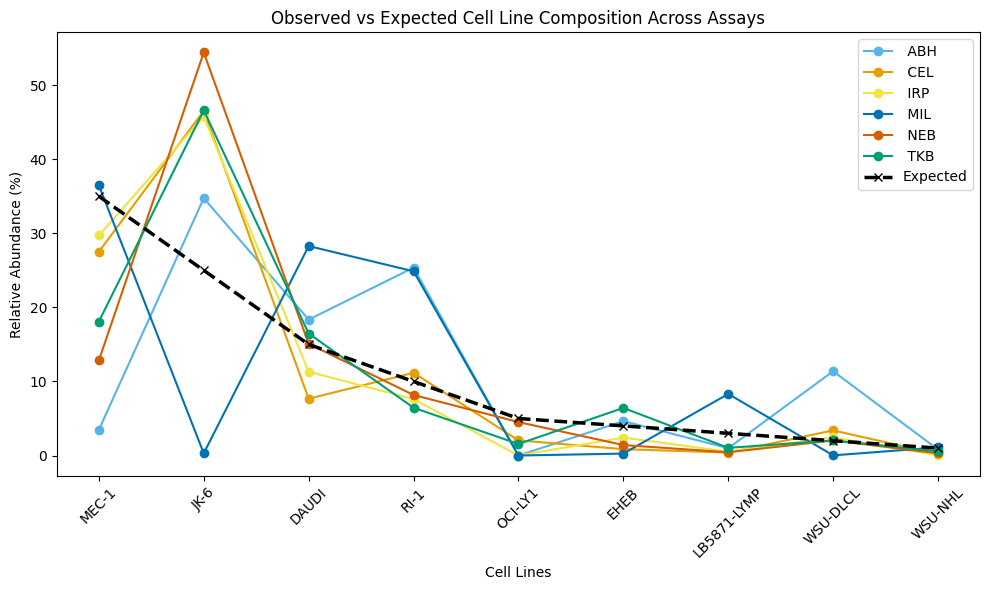

Plot saved as: Heavy-MME-Illumina_clonotypes_percentage_assay_vs_expected.png


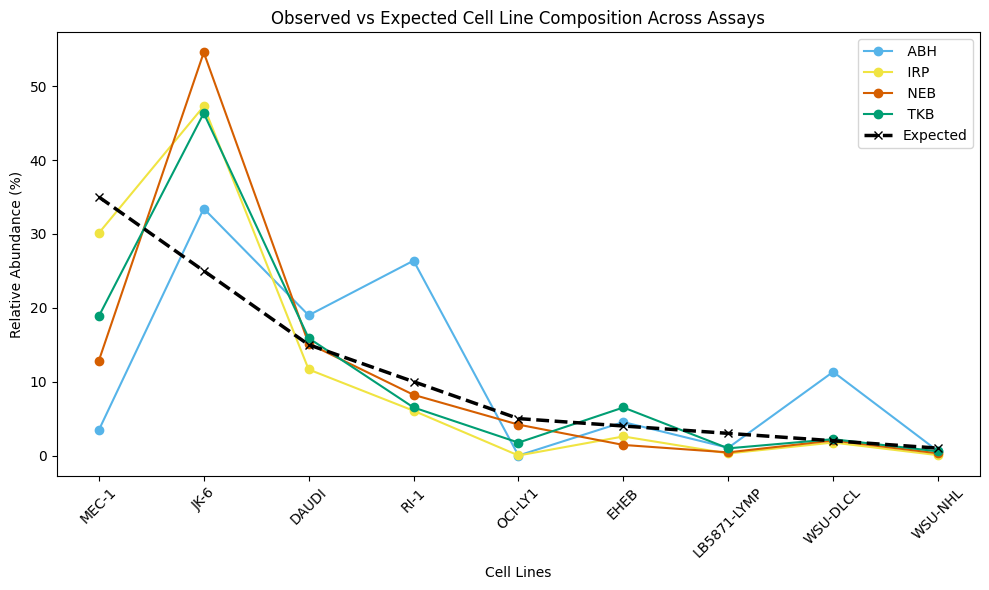

Plot saved as: Heavy-MME_ElementBio_clonotypes_percentage_assay_vs_expected.png


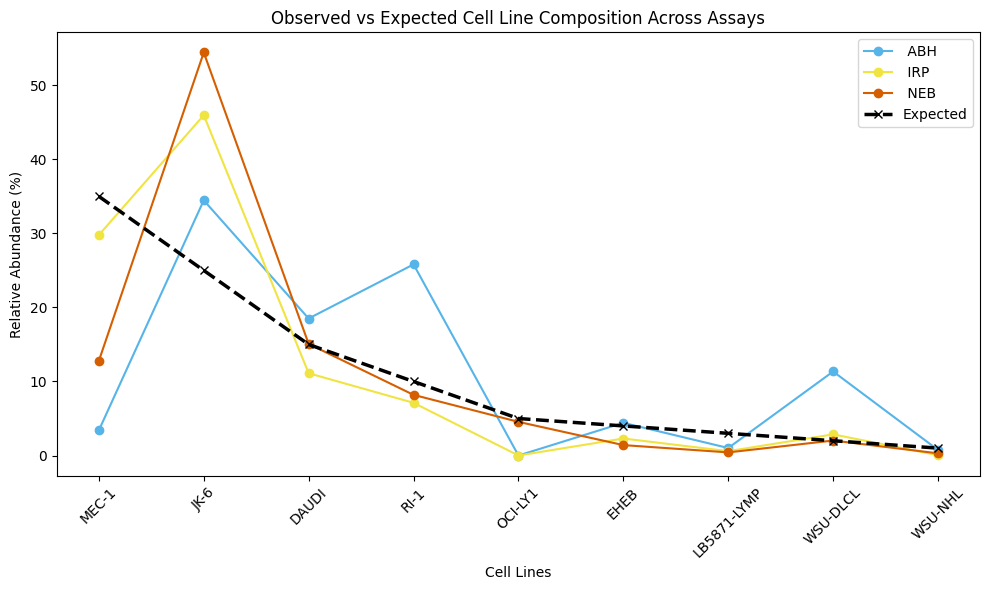

Plot saved as: Heavy-MME_MGI_clonotypes_percentage_assay_vs_expected.png


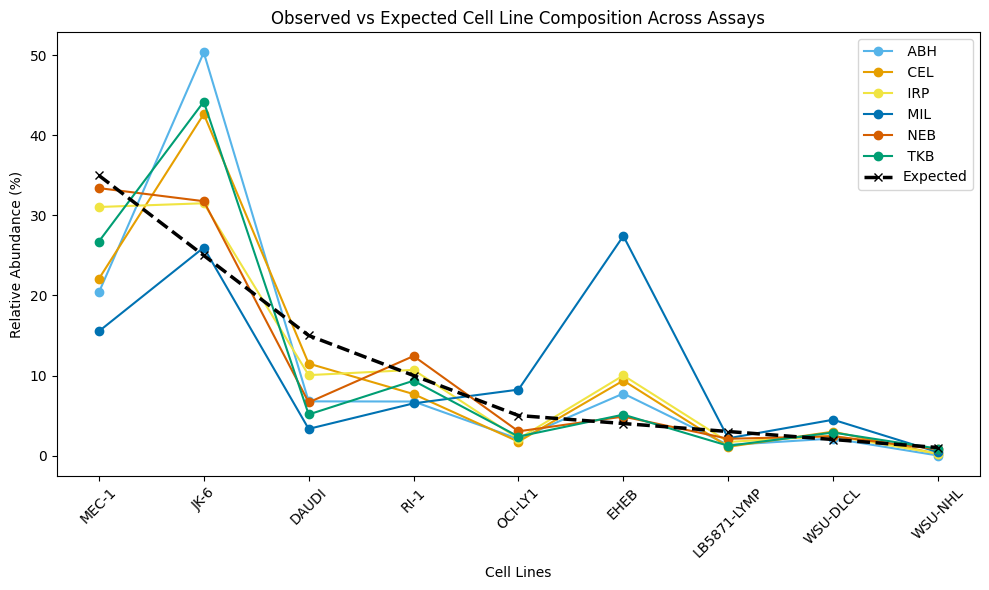

Plot saved as: Light-MME-Illumina_clonotypes_percentage_assay_vs_expected.png


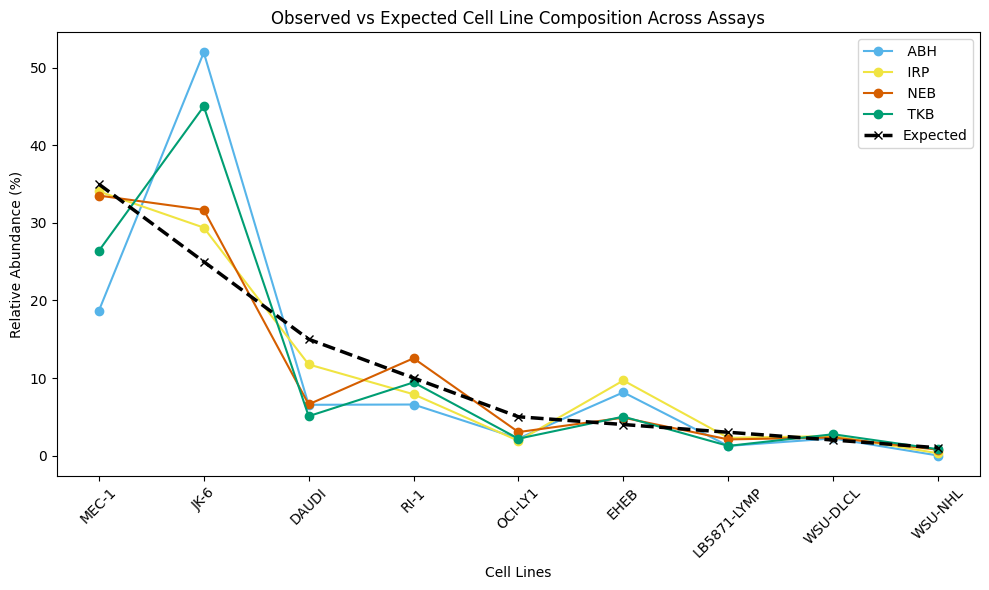

Plot saved as: Light-MME_ElementBio_clonotypes_percentage_assay_vs_expected.png


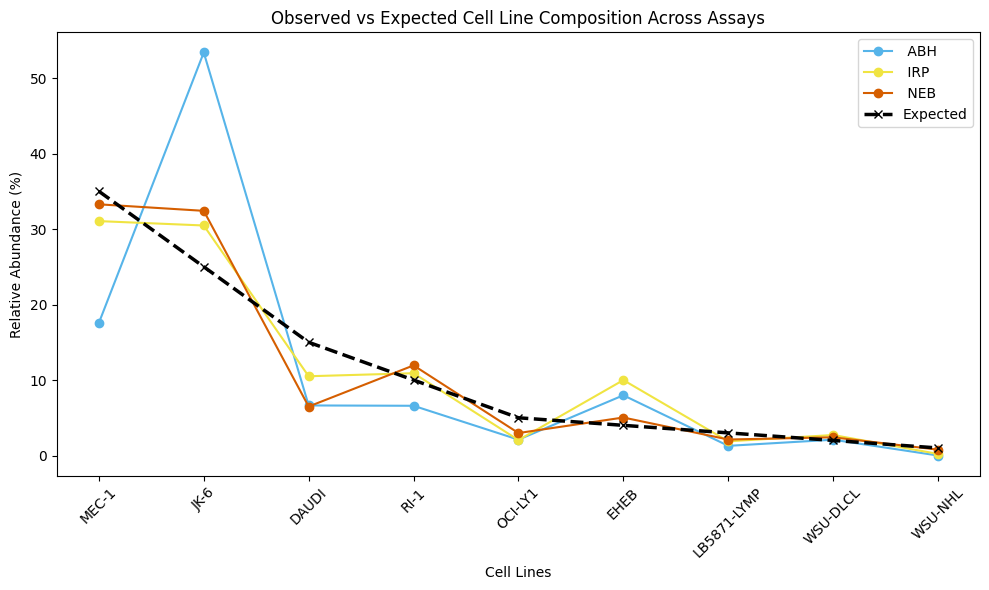

Plot saved as: Light-MME_MGI_clonotypes_percentage_assay_vs_expected.png


In [10]:
os.chdir('/home/rittika/Workprojects/Assay comparison/RNA100ng/All_Assays/')

plot_assay_vs_expected('Heavy-MME-Illumina_clonotypes_percentage.tsv')
plot_assay_vs_expected('Heavy-MME_ElementBio_clonotypes_percentage.tsv')
plot_assay_vs_expected('Heavy-MME_MGI_clonotypes_percentage.tsv')

plot_assay_vs_expected('Light-MME-Illumina_clonotypes_percentage.tsv')
plot_assay_vs_expected('Light-MME_ElementBio_clonotypes_percentage.tsv')
plot_assay_vs_expected('Light-MME_MGI_clonotypes_percentage.tsv')


DNA-500ng-Illumina-heavy-allassays


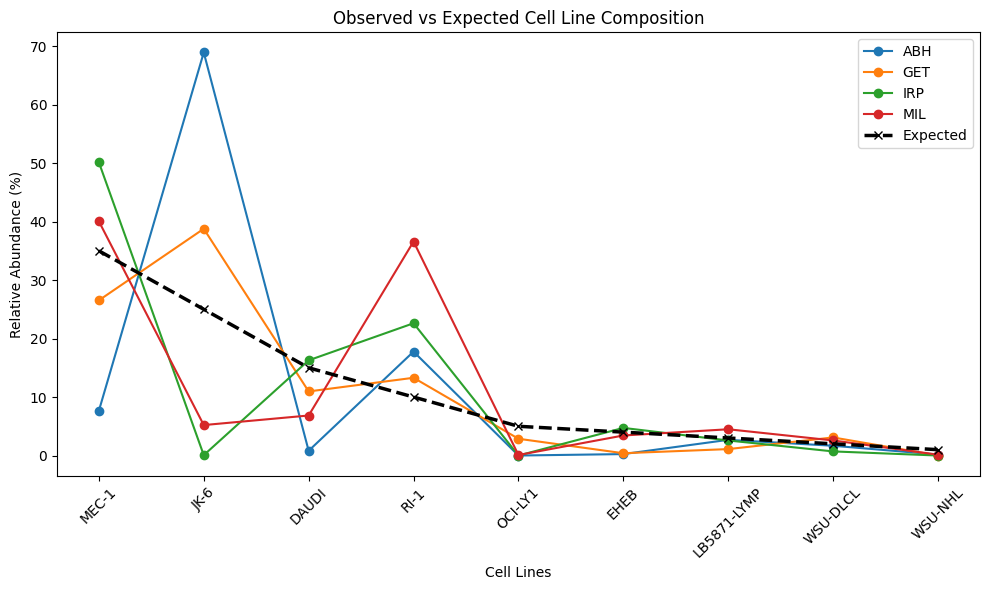

Plot saved as: DNA-500ng-Illumina-heavy-allassays_assay_vs_expected.png


In [43]:
os.chdir('/home/rittika/Workprojects/Assay comparison/DNA 500ng and 2000ng assay comparison')

plot_assay_vs_expected('DNA-500ng-Illumina-heavy-allassays.tsv')
plot_assay_vs_expected('DNA-2000ng-Illumina-heavy-allassays.tsv')

RNA-25ng-Illumina-All-MME-Heavy_clonotypes_percentage


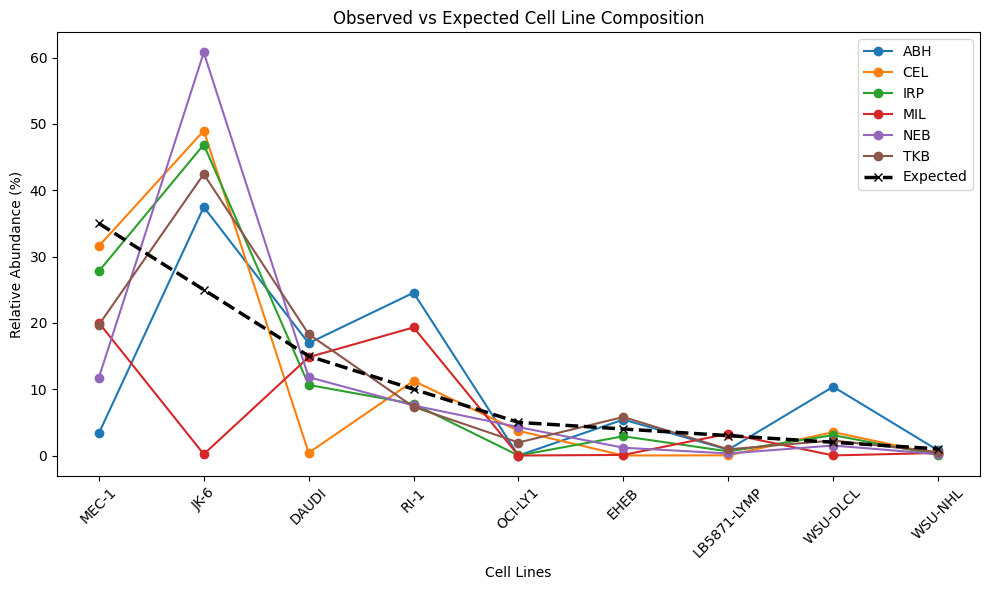

Plot saved as: RNA-25ng-Illumina-All-MME-Heavy_clonotypes_percentage_assay_vs_expected.png
RNA-25ng-Illumina-All-MME-Light_clonotypes_percentage


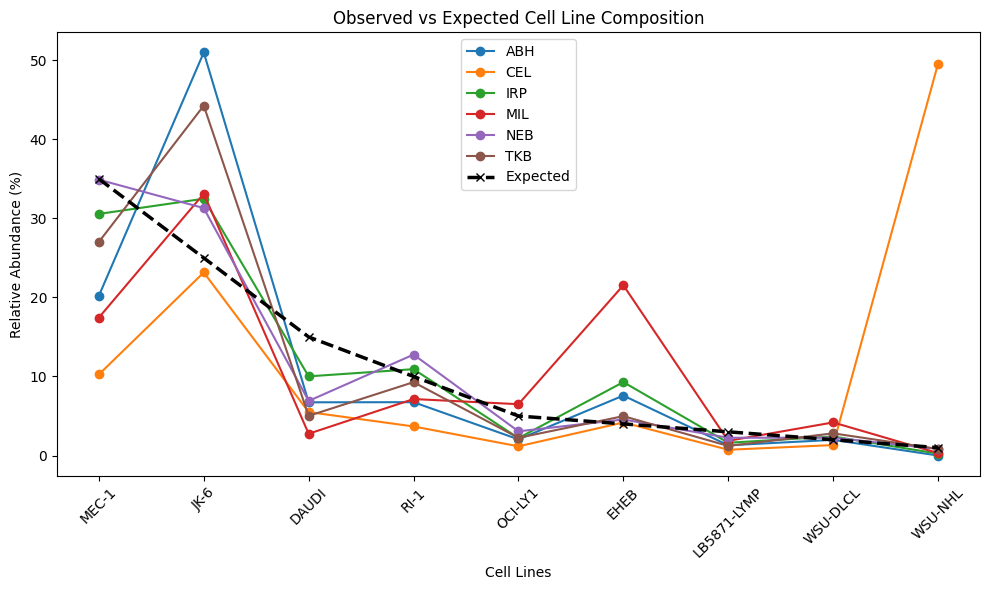

Plot saved as: RNA-25ng-Illumina-All-MME-Light_clonotypes_percentage_assay_vs_expected.png
RNA-25ng-ElementBio-All-MME-Heavy_clonotypes_percentage


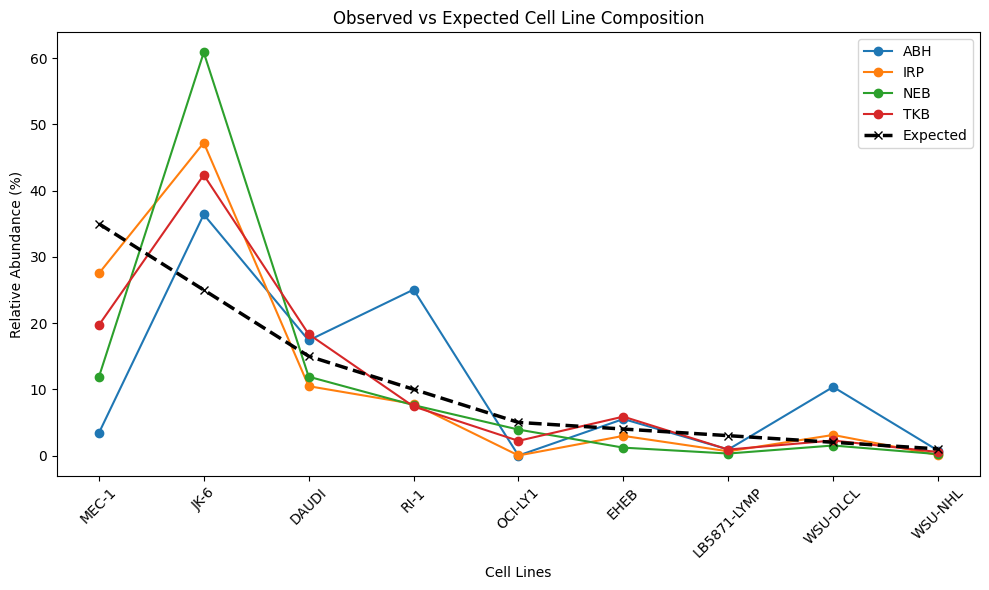

Plot saved as: RNA-25ng-ElementBio-All-MME-Heavy_clonotypes_percentage_assay_vs_expected.png
RNA-25ng-ElementBio-All-MME-Light_clonotypes_percentage


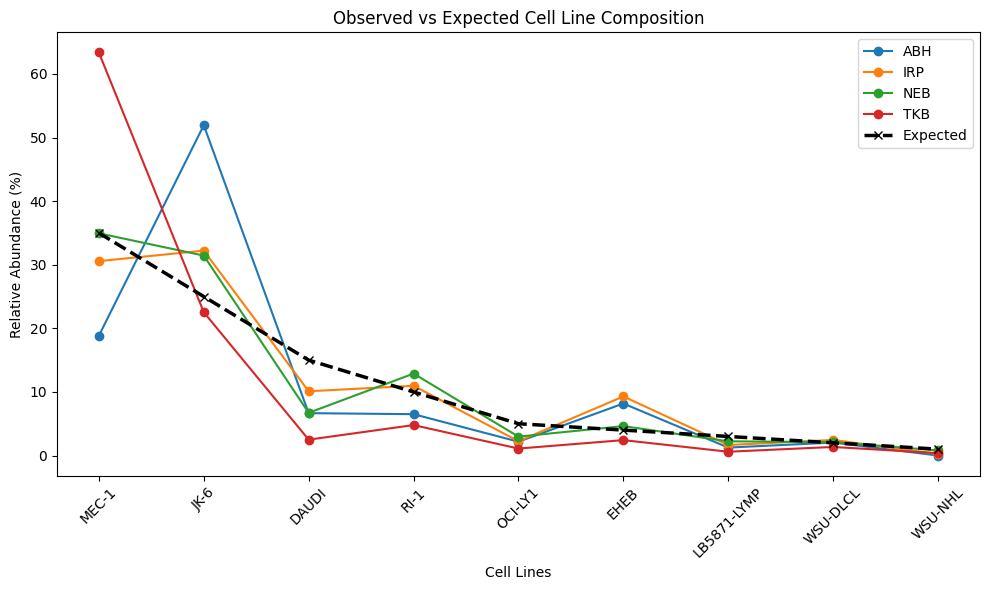

Plot saved as: RNA-25ng-ElementBio-All-MME-Light_clonotypes_percentage_assay_vs_expected.png
RNA-25ng-MGI-All-MME-Heavy_clonotypes_percentage


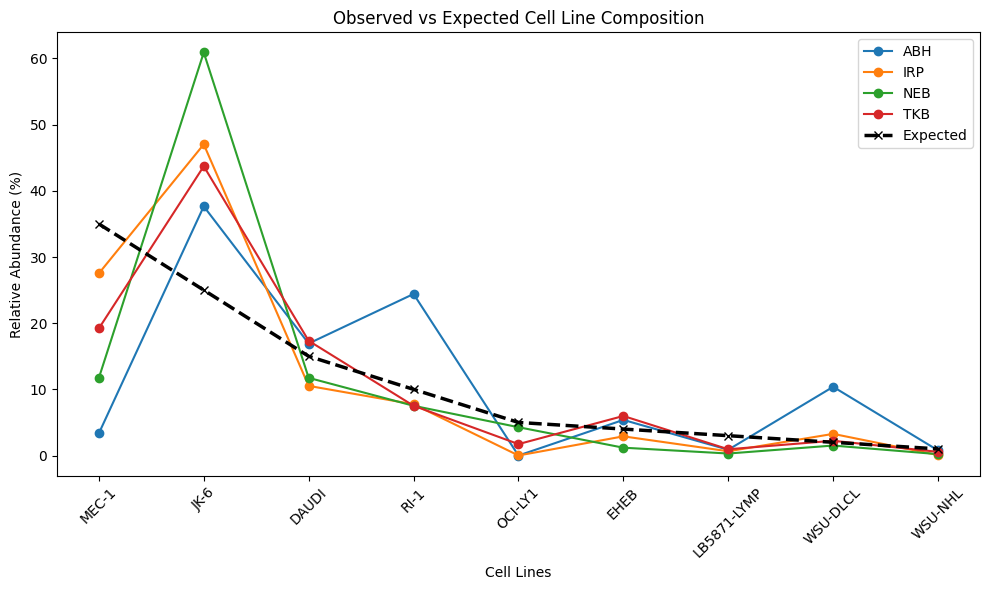

Plot saved as: RNA-25ng-MGI-All-MME-Heavy_clonotypes_percentage_assay_vs_expected.png
RNA-25ng-MGI-All-MME-Light_clonotypes_percentage


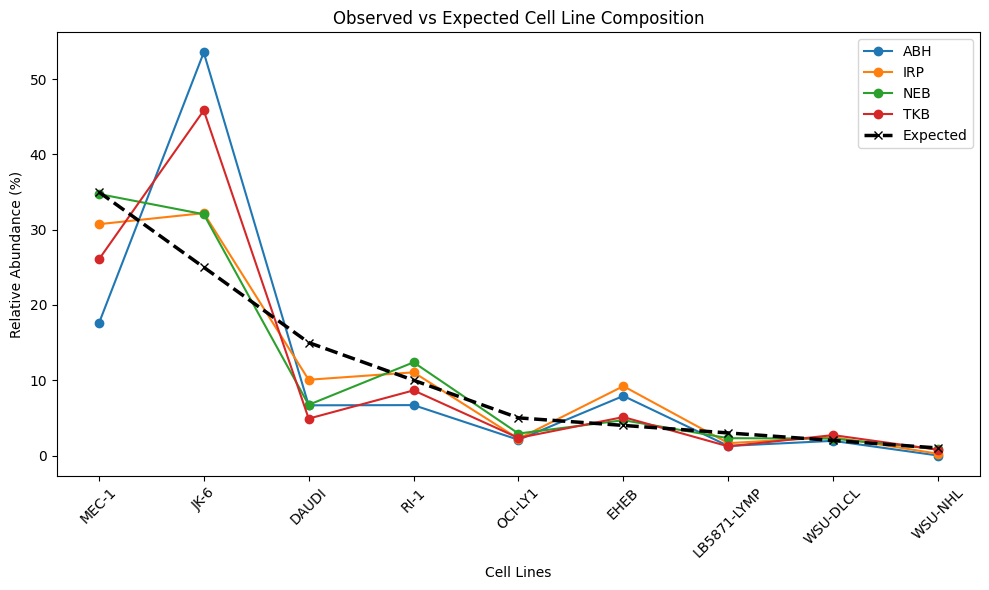

Plot saved as: RNA-25ng-MGI-All-MME-Light_clonotypes_percentage_assay_vs_expected.png


In [6]:
os.chdir('/home/rittika/Workprojects/Assay comparison/RNA 25ng')

###--Illumina 25ng
plot_assay_vs_expected('RNA-25ng-Illumina-All-MME-Heavy_clonotypes_percentage.tsv')
plot_assay_vs_expected('RNA-25ng-Illumina-All-MME-Light_clonotypes_percentage.tsv')

###--ElementBio 25ng
plot_assay_vs_expected('RNA-25ng-ElementBio-All-MME-Heavy_clonotypes_percentage.tsv')
plot_assay_vs_expected('RNA-25ng-ElementBio-All-MME-Light_clonotypes_percentage.tsv')

###--MGI 25ng
plot_assay_vs_expected('RNA-25ng-MGI-All-MME-Heavy_clonotypes_percentage.tsv')
plot_assay_vs_expected('RNA-25ng-MGI-All-MME-Light_clonotypes_percentage.tsv')

In [ ]:
os.chdir('/home/rittika/Workprojects/Assay comparison/RNA 500ng')

###--Illumina 500ng
plot_assay_vs_expected('RNA-500ng-Illumina-All-MME-Heavy_clonotypes_percentage.tsv')
plot_assay_vs_expected('RNA-500ng-Illumina-All-MME-Light_clonotypes_percentage.tsv')

###--ElementBio 500ng
plot_assay_vs_expected('RNA-500ng-ElementBio-All-MME-Heavy_clonotypes_percentage.tsv')
plot_assay_vs_expected('RNA-500ng-ElementBio-All-MME-Light_clonotypes_percentage.tsv')

###--MGI 500ng
plot_assay_vs_expected('RNA-500ng-MGI-All-MME-Heavy_clonotypes_percentage.tsv')
plot_assay_vs_expected('RNA-500ng-MGI-All-MME-Light_clonotypes_percentage.tsv')